In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    plt.show()

In [3]:
class_names = ["EMCI","LMCI","MCI","AD","CN"]
class_index=[0,1,2,3,4]

In [4]:
path=r"C:\Users\matrix\Desktop\Alzheimers-ADNI"

In [6]:
import pickle
fileOpen = open(path+'/data',"rb")
data = pickle.load(fileOpen)
fileOpen.close()

trainData=data['X']
trainDataLables=data['y']
flatTrainData=[]
for i in trainData:
    flatTrainData.append(i.flatten())
flatTrainData=np.array(flatTrainData)
print(flatTrainData.shape,trainDataLables.shape)


fileOpen = open(path+'/val_data2',"rb")
test_data = pickle.load(fileOpen)
fileOpen.close()

x_val=test_data['X']
y_val=test_data['y']
flatTestData=[]
for i in x_val:
    flatTestData.append(i.flatten())
x_val=np.array(flatTestData)
print(x_val.shape,y_val.shape)

(2430, 16384) (2430,)
(435, 16384) (435,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(flatTrainData,
                                                    trainDataLables,
                                                    test_size=.25,
                                                    random_state=1234123)

In [8]:
model = RandomForestClassifier(max_depth=20, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [10]:
y_pred = model.predict(x_val)

# calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.38850574712643676


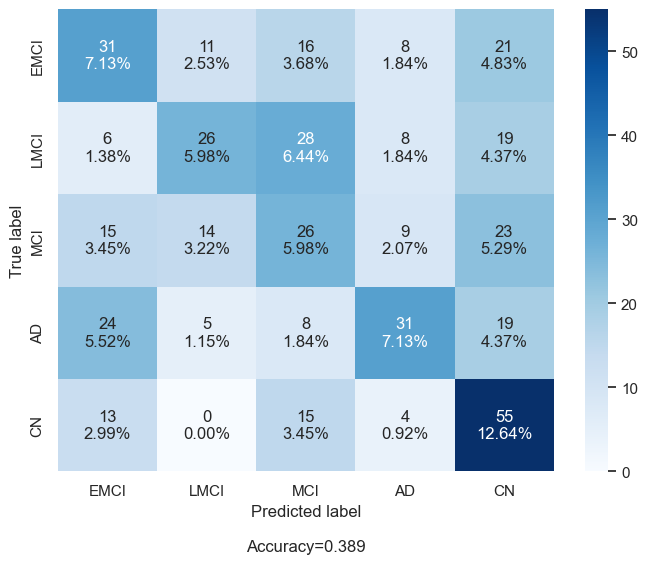

In [12]:
sns.set()
cf_matrix=confusion_matrix(y_val, y_pred)
make_confusion_matrix(cf_matrix,categories=class_names,cmap='Blues',figsize=(8,6))

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X_train, y_train,cv=10)

In [ ]:
score

array([0.72131148, 0.71038251, 0.74175824, 0.72527473, 0.68131868,
       0.65384615, 0.67032967, 0.67582418, 0.73076923, 0.7032967 ])

In [ ]:
arr=[0.71584699, 0.72677596, 0.64285714, 0.67582418, 0.72527473,
       0.69230769, 0.78571429, 0.69230769, 0.71978022, 0.64285714]
arr=np.array(arr)
print(np.average(arr))
print(np.average(np.array(score)))

0.701954603
0.7014111571488622


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        EMCI       0.72      0.67      0.69       112
        LMCI       0.83      0.94      0.88       140
         MCI       0.72      0.62      0.67       130
          AD       0.82      0.80      0.81       116
          CN       0.61      0.65      0.63       110

    accuracy                           0.74       608
   macro avg       0.74      0.74      0.74       608
weighted avg       0.74      0.74      0.74       608

